Phase 1 Project 

1.0 Business Understanding:
Our company is expanding into the aviation industry, with plans to purchase and operate aircraft for both commercial and private use. To mitigate potential risks, we need to identify which aircraft types present the lowest risk for this new venture. This analysis will guide the decision-making process by providing data-driven insights into the safety records of various aircraft. Our findings will be translated into actionable business recommendations, ensuring that the company makes informed decisions in entering this new market.

2.0 Data Understanding
In this section, my focus is on exploring and familiarizing myself with the dataset to identify its structure, contents, and potential issues.

2.1 Data Collection
Data source: This dataset is from the National Transportation Safety Board. Dataset Overview: It includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.
It was downloaded from Kaggle.com 

2.2 Data Exploration 

In [842]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2.3 Reading the Dataset from our CSV file
The dataset we will use contains aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.
Dataset link for download or access: https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses?resource=download

In [843]:
#The CSV file contains characters that are not encoded in UTF-8 hence the use of Windows-1252: This is a superset of ISO-8859-1 and is used on Windows.
df1 = pd.read_csv("AviationData.csv", index_col=None, low_memory=False, encoding='Windows-1252') 

2.4 Dataset Preview

In [844]:
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


2.5 Accessing Information about our Dataset

In [845]:
#Getting a summary of the dataset by accessing its information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [846]:
df1.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [847]:
df1.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

3.0 Data Cleaning 

In [848]:
# I will keep a copy of the orginal dataset incase I need to revert back to it
df2 = df1.copy(deep= True)

Relevant Columns (Keep):

The analysis is focused on determining the lowest-risk aircraft to purchase and operate for my company's new aviation venture, I want to prioritize columns that provide insights into the causes and severity of accidents, as well as characteristics of the aircraft. The columns below are important for my analysis as they provide details about the accidents, the aircraft involved, and injury outcomes

Investigation.Type: Important to know whether it was an accident or incident.
Event.Date: Useful for time-based analysis (e.g., trends over time).
Location: Can help determine if certain locations are riskier.
Country: Country of occurrence may affect regulatory compliance and risk factors.
Injury.Severity: Critical for assessing the severity of accidents.
Aircraft.damage: Important for understanding the level of damage in accidents.
Aircraft.Category: Useful for categorizing aircraft types (commercial, private, etc.).
Make: Manufacturer of the aircraft, useful for understanding trends by aircraft maker.
Model: Similar to "Make," helps to identify high- or low-risk models.
Amateur.Built: Identifies whether the aircraft was built by professionals or amateurs.
Number.of.Engines: Relevant for analyzing the reliability of single-engine vs multi-engine aircraft.
Engine.Type: Helps to analyze accident trends by engine type.
Total.Fatal.Injuries: Critical for assessing risk (safety is a top concern).
Total.Serious.Injuries: Indicates the severity of non-fatal injuries.
Total.Minor.Injuries: Provides additional insight into the severity of accidents.
Total.Uninjured: Can help assess the proportion of uninjured passengers/crew in accidents.
Weather.Condition: May reveal if weather plays a role in accidents.
Broad.phase.of.flight: Indicates which phase of flight is most risky.
FAR.Description: This could be important to determine the regulatory context of the flight.
Purpose.of.flight: Distinguishes between commercial and personal flights.

In [849]:
# Checking the relevance of dataset.
# I believe the following columns will not add value or help to achieve the objective of this analysis
df1 = df1.drop(columns=['Event.Id', 'Accident.Number', 'Latitude', 'Longitude', 'Airport.Code', 
                        'Airport.Name', 'Registration.Number', 'Schedule', 'Air.carrier', 
                        'Report.Status', 'Publication.Date'])


In [850]:
df1.head()

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,10/24/1948,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,7/19/1962,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,8/30/1974,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,6/19/1977,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,8/2/1979,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [851]:
df1.shape

(88889, 20)

3.1 Handling missing Values

In [852]:
#Checking missing values
df1.isnull().sum()

Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

In [853]:
#Columns with minimal missing data (Location, Country, Make, Model)
#strategy: Lets Impute missing values by dropping rows from these columns. The percentage of dropped columns is less than 0.1%, This will have minimum impact on the overall analysis   

df1.dropna(subset=['Location', 'Country', 'Make', 'Model'], inplace=True)

In [854]:
#Lets create a column for make & model to comnbine them for better handling
df1['Make.Model'] = df1['Make'] + ' ' + df1['Model']
df1['Engine.Type'] = df1['Engine.Type'].replace('Unknown', pd.NA)


In [855]:
df1['Engine.Type'] = df1.groupby('Make.Model')['Engine.Type'].apply(lambda x: x.ffill().bfill())

In [856]:
#Columns with significant missing data (Injury Severity, Aircraft damage, Broad phase of flight,Amateur.Built, Engine.Type )
#Strategy: We can Impute with the mode or drop rows where critical information is missing. In this cases, imputing with a placeholder value "Unknown" is appropriate since it will work with our analysis.

df1['Injury.Severity'].fillna('Unknown', inplace=True) 
df1['Aircraft.damage'].fillna('Unknown', inplace=True) 
df1['Broad.phase.of.flight'].fillna('Unknown', inplace=True) 
df1['Amateur.Built'].fillna('Unknown', inplace=True)


In [857]:
#For numeric injury-related columns (Total.Fatal.Injuries, Total.Serious.Injuries,Total minor injuries,total Uninjured) we can

    #Impute missing values with 0 since it makes sense that missing data implies no injuries.
df1['Total.Fatal.Injuries'].fillna(0, inplace=True)
df1['Total.Serious.Injuries'].fillna(0, inplace=True)
df1['Total.Minor.Injuries'].fillna(0, inplace=True)
df1['Total.Uninjured'].fillna(0, inplace=True)

In [858]:
#Columns with Extremely High Missing Data (Aircraft.Category, FAR.Description, Engine.Type, and Purpose.of.flight)
#Strategy1: For Aircraft.Category and FAR.Description - The missing values are too high in these columns, I considered dropping them from the analysis as they don’t provide enough data for useful insights.
df1.drop(columns=['Aircraft.Category', 'FAR.Description'], inplace=True)

In [859]:
#strategy2: For categorical columns like Amateur.Built, Number.of.Engines, and Engine.Type,etc I can impute missing values with the mode or a placeholder like "Unknown."
df1['Amateur.Built'].fillna('Unknown', inplace=True)
df1['Number.of.Engines'].fillna(df1['Number.of.Engines'].mode()[0], inplace=True) 
df1['Engine.Type'].fillna('Unknown', inplace=True)
df1['Weather.Condition'].fillna('Unknown', inplace=True)
df1['Purpose.of.flight'].fillna('Unknown', inplace=True)

In [860]:
# Drop rows where 'Number.of.Engines' is 0
df1 = df1[df1['Number.of.Engines'] != 0] #an aircraft must have atleast one engine

In [861]:
df1.head()

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make.Model
0,Accident,10/24/1948,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Stinson 108-3
1,Accident,7/19/1962,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Piper PA24-180
2,Accident,8/30/1974,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Cessna 172M
3,Accident,6/19/1977,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Rockwell 112
4,Accident,8/2/1979,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,1.0,Turbo Jet,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Cessna 501


In [862]:
#lets confirm we handled all missing values
df1.isnull().sum()

Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Make.Model                0
dtype: int64

In [863]:
df1.shape

(87281, 19)

In [864]:
#Checking for duplicates
df1.duplicated().any()

True

In [865]:
# We have some duplicates, before anything, I want to see what are the duplicates. This will inform how to handle them
duplicates = df1[df1.duplicated()]
print(duplicates)



      Investigation.Type  Event.Date          Location         Country  \
1371            Accident   5/28/1982    EVANSVILLE, IN   United States   
3082            Accident  10/18/1982    GULF OF MEXICO  GULF OF MEXICO   
4761            Accident   5/22/1983    BRIDGEPORT, CA   United States   
7941            Accident   4/13/1984        DELAND, FL   United States   
8661            Accident   6/18/1984      PORTLAND, AR   United States   
13532           Accident  11/30/1985     SAN PEDRO, CA   United States   
19820           Incident   3/10/1988    GREENSBORO, NC   United States   
21077           Incident    8/5/1988       ATLANTA, GA   United States   
22453           Incident    3/1/1989       HOUSTON, TX   United States   
24878           Accident    2/9/1990     TETERBORO, NJ   United States   
26868           Accident  10/20/1990          KENT, OH   United States   
27496           Accident    3/2/1991        MARANA, AZ   United States   
27811           Accident   4/19/1991  

In [866]:
#Based on the output of the duplicates in the above cell, we can't drop thems as they are in columns that can be repeated in a dataset. i.e country, Location,Event date and Investigative date
#These Columns cut across and can be helpful for our analysis
#Strategy: Keep duplicates as they are critical to the analysis

3.2 Checking Outliers

Given the dataset, we can examine various columns for potential outliers, especially numerical columns like Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries and Total.Uninjured.

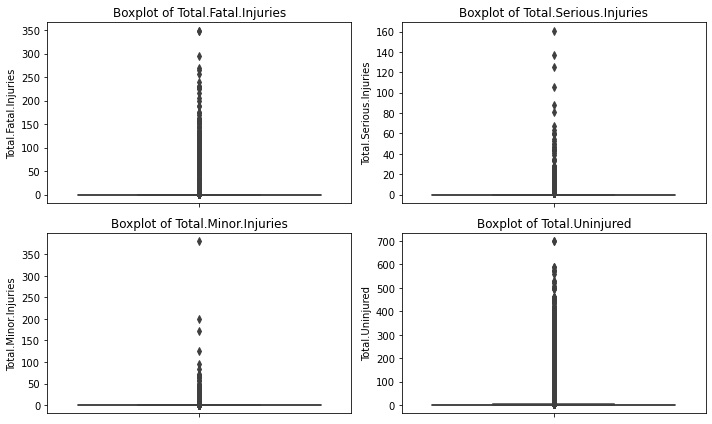

In [867]:
#Strategy1: Visualize Outliers Using Boxplots
#A boxplot is an effective way to visualize outliers in numerical data. Outliers are often values that are far away from the interquartile range (IQR). 

# List of numerical columns where we expect outliers
columns_to_check = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Create boxplots for each column
plt.figure(figsize=(10, 6))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df1[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


3.3 Handlding outliers 
Domain understanding: Outliers in aviation accident data could represent extreme, but rare, events. These might include crashes or accidents with unusually high fatalities or injuries. 
In the aviation industry, outliers could provide crucial insights, so removing them without proper consideration may cause lose key information.
Based on the nature of our analysis, I decided on retaining the outliers but carefully segmenting them by aircraft model or incident type. This might give me a perspective into my analysis
We have incidents or accidents that can result to outliers and this can be crucial for assessing the overall safety profile of an aircraft and can provide our company with a comprehensive view of potential risks and make informed decisions about aircraft purchases.


4.0 Top Level Analysis

In this section we are going to performa quick overview analysis to understand our data, identify trends, and insights

AIRCRAFT PERFORMANCE & RISK ASSESSMENT

4.1 What is the total number of accidents for each aircraft?
This question will help us indentify models that might require further investigation into reliability

In [868]:
# The following code will group the data by 'Make' and 'Model', and count the number of accidents for each aircraft
accident_count = df1.groupby(['Make', 'Model']).size().reset_index(name='Accident Count').sort_values(by='Accident Count', ascending=False)
accident_count

,Make,Model,Accident Count
5557,Cessna,152,2165
5579,Cessna,172,1250
5623,Cessna,172N,993
14721,Piper,PA-28-140,810
5532,Cessna,150,715
...,...,...,...
8084,Embraer,ERJ-135,1
8085,Embraer,ERJ-135ER,1
8086,Embraer,ERJ-145LR,1
8087,Embraer,ERJ-170,1


4.2 Accident Frequency Analysis: Which aircraft has the highest & Lowest number of fatal injuries

In [869]:
# To determine the aircraft with the highest number of fatal injuries
Highest_Fatal_Injuries = df1.groupby(['Make', 'Model'])['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)
Highest_Fatal_Injuries

Make     Model    
BOEING   737          1348.0
Boeing   737-200       906.0
BOEING   777 - 206     534.0
Boeing   MD-82         403.0
AIRBUS   A321          381.0
Cessna   172N          362.0
Piper    PA-28-181     359.0
Tupolev  TU-154        349.0
Boeing   747-168       349.0
Cessna   152           348.0
Name: Total.Fatal.Injuries, dtype: float64

In [870]:
# To determine the aircraft with the lowest number of fatal injuries
Lowest_fatal_Injuries = df1.groupby(['Make', 'Model'])['Total.Fatal.Injuries'].sum().sort_values(ascending=True)
Lowest_fatal_Injuries

Make      Model             
HEAD      AX8 88B                  0.0
Larson    Kitfox III               0.0
          Murphy Rebel             0.0
Lassiter  SWEARINGEN SX300         0.0
Latham    PITTS SPECIAL S-1C       0.0
                                 ...  
AIRBUS    A321                   381.0
Boeing    MD-82                  403.0
BOEING    777 - 206              534.0
Boeing    737-200                906.0
BOEING    737                   1348.0
Name: Total.Fatal.Injuries, Length: 19571, dtype: float64

4.3 Which regions have the highest number of reported accidents 

In [871]:
# The following code wil determine regions with highest number of accidents
accident_count_by_Region = df1.groupby(['Location', 'Country']).size().reset_index(name='High Risk Regions').sort_values(by='High Risk Regions', ascending=False)
accident_count_by_Region

,Location,Country,High Risk Regions
419,"ANCHORAGE, AK",United States,433
15002,"MIAMI, FL",United States,199
10570,"HOUSTON, TX",United States,191
4010,"CHICAGO, IL",United States,184
7743,"FAIRBANKS, AK",United States,173
...,...,...,...
11492,"Ironside, OR",United States,1
11489,"Irkutsk, Russia",Russia,1
11488,"Irineopolis, Brazil",Brazil,1
11487,"Ireland, IN",United States,1


4.4 Assessing the risk of aircraft by Engine Type and Number of engines- How many times a particular type was reported in an accident 

In [872]:

# Group by 'Engine.Type' and count the number of accidents
accidents_by_engine_type = df1.groupby('Engine.Type').size().sort_values(ascending=False)
accidents_by_engine_type

Engine.Type
Reciprocating      72334
Turbo Shaft         3988
Turbo Prop          3806
Turbo Fan           3714
Unknown             2581
Turbo Jet            794
Geared Turbofan       32
None                  16
Electric              11
LR                     2
UNK                    1
NONE                   1
Hybrid Rocket          1
dtype: int64

In [873]:
# Group by 'Number of Engines' and count the number of accidents
accidents_by_Number_of_Engines = df1.groupby('Number.of.Engines').size().sort_values(ascending=False).head(10)
accidents_by_Number_of_Engines

Number.of.Engines
1.0    75378
2.0    10998
3.0      476
4.0      425
8.0        3
6.0        1
dtype: int64

4.5 Is there a relationship between an Amateur.Built aircraft and reported accidents?

In [874]:
accidents_by_Amateur_Built = df1.groupby('Amateur.Built').size().sort_values(ascending=False).head(10)
accidents_by_Amateur_Built

Amateur.Built
No         78819
Yes         8367
Unknown       95
dtype: int64

4.6 Which year has the highest reported rate of accidents?

In [875]:
# Ensure 'Event.Date' is in datetime format
df1['Event.Date'] = pd.to_datetime(df1['Event.Date'], errors='coerce')

# Extract the year from 'Event.Date'
df1['Year'] = df1['Event.Date'].dt.year

# Count the number of accidents per year
accidents_per_year = df1.groupby('Year').size()

# Find the year with the highest number of accidents
highest_accident_year = accidents_per_year.idxmax()
highest_accident_count = accidents_per_year.max()

print(f"The year with the highest number of accidents is {highest_accident_year} with {highest_accident_count} accidents.")

# Optionally, display the top 10 years with the highest number of accidents
top_years = accidents_per_year.sort_values(ascending=False).head(10)
print(top_years)


The year with the highest number of accidents is 1983 with 3496 accidents.
Year
1983    3496
1982    3482
1984    3397
1985    3051
1986    2836
1987    2778
1988    2646
1989    2501
1990    2449
1991    2378
dtype: int64


4.7 What is the trend of accidents over the years

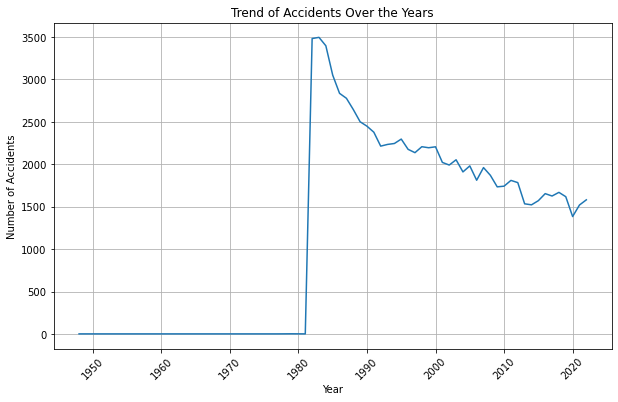

In [876]:
# lets ensure 'Event.Date' is in datetime format (if not done earlier)
df1['Event.Date'] = pd.to_datetime(df1['Event.Date'], errors='coerce')

# Extract the year from 'Event.Date'
df1['Year'] = df1['Event.Date'].dt.year

# Count the number of accidents per year
accidents_per_year = df1.groupby('Year').size()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Trend of Accidents Over the Years')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.show()

4.8 Which aircraft model and Make was involved in the accident in 1983 when there was an abnormal spike in numbers

In [877]:
# Filter the dataset for accidents in the year 1983
accidents_1983 = df1[df1['Year'] == 1983]
# Select the columns 'Make' and 'Model' and count number of accident per aircraft model and make
make_model_1983 = accidents_1983.groupby(['Make', 'Model']).size().reset_index(name='Accident Count').sort_values(by='Accident Count', ascending=False)
make_model_1983


,Make,Model,Accident Count
359,Cessna,152,141
366,Cessna,172,73
346,Cessna,150,56
1065,Piper,PA-28-140,42
1125,Piper,PA-38-112,41
...,...,...,...
585,Cessna,TU-206,1
586,Cessna,TU-206A,1
587,Cessna,TU-206G,1
589,Cessna,TU206-G,1


In [878]:
df1.to_csv("AviationData_cleancopy.csv")

Ratio of accidnts by Make and Model

In [879]:
# Step 1: Filter only for rows where Investigation.Type is "Accident"
accidents_df = df1[df1['Investigation.Type'] == 'Accident']

# Step 2: Group by Make and Model, and count the number of accidents
accidents_per_aircraft = accidents_df.groupby(['Make', 'Model']).size().reset_index(name='Accident_Count')

# Step 3: Calculate total number of accidents
total_accidents = accidents_per_aircraft['Accident_Count'].sum()

# Step 4: Calculate the percentage of total accidents for each aircraft
accidents_per_aircraft['Accident_Percentage'] = (accidents_per_aircraft['Accident_Count'] / total_accidents) * 100

# Step 5: Sort by percentage to get the top planes involved in accidents
top_10_aircraft_by_accidents = accidents_per_aircraft.sort_values(by='Accident_Percentage', ascending=False).head(10)

# Display the result
top_10_aircraft_by_accidents[['Make', 'Model', 'Accident_Count', 'Accident_Percentage']]


,Make,Model,Accident_Count,Accident_Percentage
5121,Cessna,152,2152,2.577492
5143,Cessna,172,1246,1.492359
5187,Cessna,172N,990,1.185742
14017,Piper,PA-28-140,807,0.966560
5096,Cessna,150,710,0.850381
5185,Cessna,172M,659,0.789297
5190,Cessna,172P,593,0.710248
5120,Cessna,150M,536,0.641978
13911,Piper,PA-18,534,0.639582
14026,Piper,PA-28-161,497,0.595267


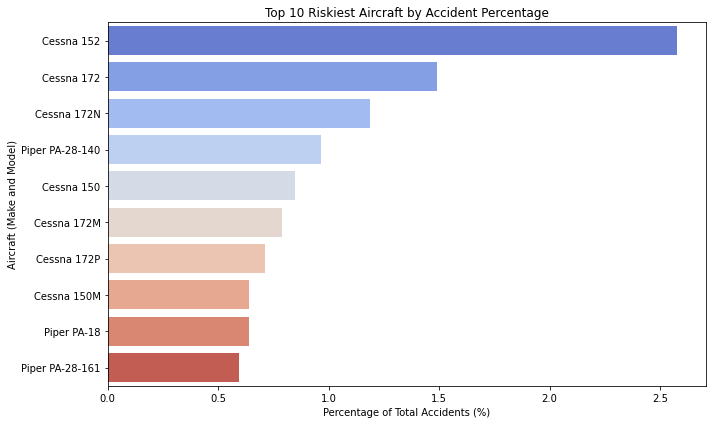

In [880]:


# Assuming 'top_10_aircraft_by_accidents' contains the data with 'Make', 'Model', and 'Accident_Percentage'

# Combine 'Make' and 'Model' into one column for better labeling
top_10_aircraft_by_accidents['Aircraft'] = top_10_aircraft_by_accidents['Make'] + ' ' + top_10_aircraft_by_accidents['Model']

# Sort the data by percentage in descending order for plotting
top_10_aircraft_by_accidents = top_10_aircraft_by_accidents.sort_values(by='Accident_Percentage', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Accident_Percentage', y='Aircraft', data=top_10_aircraft_by_accidents, palette='coolwarm')

# Add labels and title
plt.xlabel('Percentage of Total Accidents (%)')
plt.ylabel('Aircraft (Make and Model)')
plt.title('Top 10 Riskiest Aircraft by Accident Percentage')

# Show the plot
plt.tight_layout()
plt.show()


In [881]:
# Filter the DataFrame for rows where the 'Investigation.Type' is 'Accident'
total_accidents = df1[df1['Investigation.Type'] == 'Accident'].shape[0]

# Print the result
print(f'Total number of accidents: {total_accidents}')


Total number of accidents: 83492
